In [20]:
#first, let's load the parameters of the policy

import jsonpickle
policy_file_name = 'best_theta.json'
best_theta_dict = jsonpickle.decode(open(policy_file_name).read())
best_theta = best_theta_dict['theta']

In [21]:
best_theta

array([[ 0.69646918],
       [ 0.28613934],
       [ 0.22685145],
       [ 0.55131477],
       [ 0.71946897],
       [ 0.42310645],
       [ 0.9807642 ],
       [ 0.68482974],
       [ 0.4809319 ],
       [ 0.39211751],
       [ 0.34317802],
       [ 0.72904971],
       [ 0.43857225],
       [ 0.05967789],
       [ 0.39804426],
       [ 0.73799541],
       [ 0.18249173],
       [ 0.17545174],
       [ 0.53155138],
       [ 0.53182759],
       [ 0.63440096],
       [ 0.84943179],
       [ 0.72445533],
       [ 0.61102351],
       [ 0.72244337],
       [ 0.32295891],
       [ 0.36178866],
       [ 0.22826323],
       [ 0.29371404],
       [ 0.63097612],
       [ 0.09210493],
       [ 0.43370117],
       [ 0.43086277],
       [ 0.4936851 ],
       [ 0.4258303 ],
       [ 0.31226122],
       [ 0.4263513 ],
       [ 0.89338916],
       [ 0.94416002],
       [ 0.50183667],
       [ 0.62395295],
       [ 0.1156184 ],
       [ 0.31728548],
       [ 0.41482621],
       [ 0.86630915],
       [ 0

In [22]:
import utils
import simple_continuous_buy_sell_spy
import numpy as np
import matplotlib.pyplot as plt

In [23]:
visualize_time_length = 200

price_history = []
action_history1 = np.zeros((1,visualize_time_length+1)) #buy or sell action
action_history2 = np.zeros((1,visualize_time_length+1)) #suggested holding percentage
portfolio_value_history = []

env = simple_continuous_buy_sell_spy.simple_continuous_buy_sell_spy()
portfolio_value,price,observation = env.reset(return_price = True)

price_history.append(price)
portfolio_value_history.append(portfolio_value)

current_feature = utils.extract_features(observation)

for t in range(visualize_time_length):
    #compute an action given current observation
    action = utils.compute_action(best_theta, current_feature)
    #apply the action to the environment
    portfolio_value,price, observation,execute_action,need_to_buy,need_to_sell = env.step(action,return_price=True)
    #compute the next feature vector
    current_feature = utils.extract_features(observation)

    price_history.append(price)
    portfolio_value_history.append(portfolio_value)
    if execute_action:
        if need_to_buy:
            action_history1[0,t+1] = 2
            #print('record buy action')
        if need_to_sell:
            action_history1[0,t+1] = 1
            #print('record sell action')

    action_history2[0,t+1] = action            

In [24]:
print(len(price_history))
print(len(portfolio_value_history))
print(action_history1.shape)
print(action_history2.shape)

201
201
(1, 201)
(1, 201)


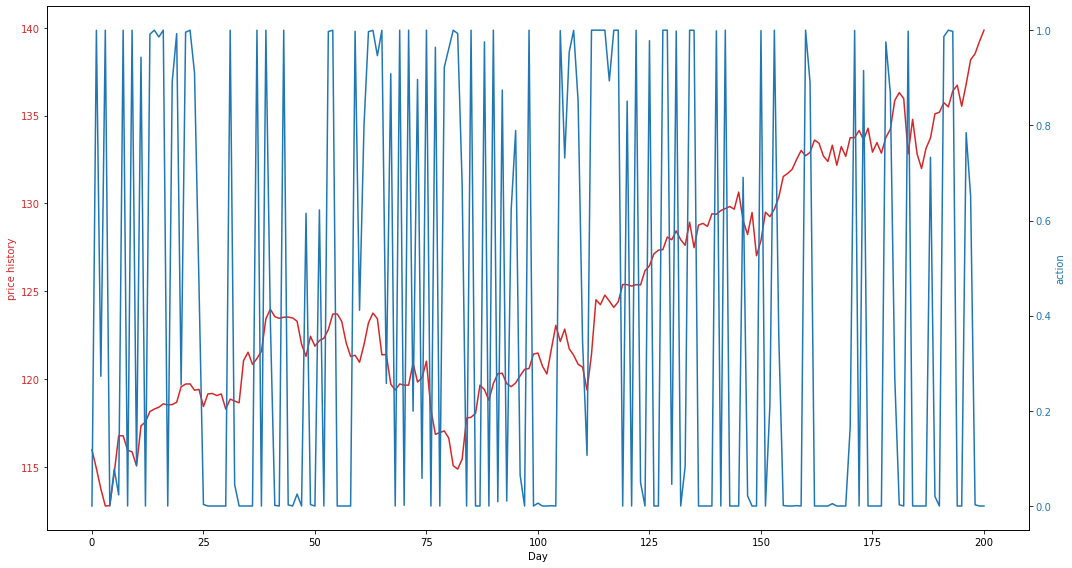

In [25]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('action', color=color)  # we already handled the x-label with ax1
ax2.plot(action_history2[0,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

begin to plot


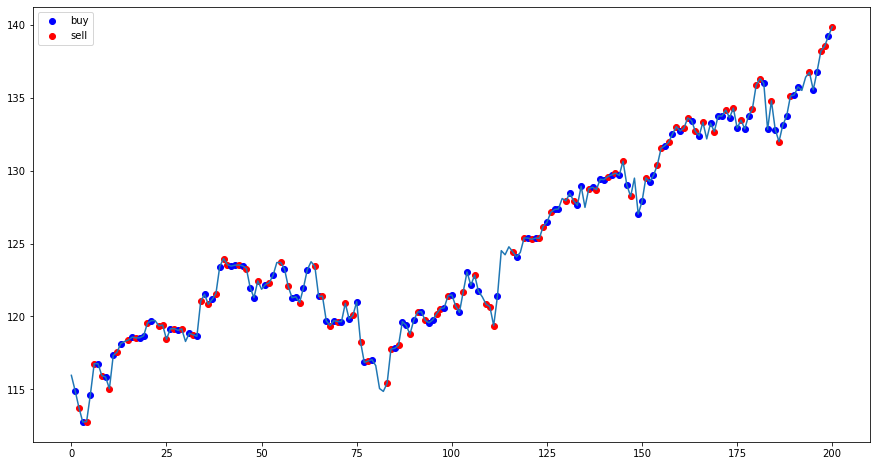

In [26]:
already_plotted_sell_legend = False
already_plotted_buy_legend = False
print('begin to plot')
plt.plot(price_history)
for time_index in range(0,len(action_history1[0])):

    if action_history1[0,time_index]==2:
        #print('the buy price is',price_history[time_index])
        if already_plotted_sell_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'b',label = 'buy')
            already_plotted_sell_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'b')

    elif action_history1[0,time_index]==1:
        #print('the sell price is',price_history[time_index])
        #print(' ')
        if already_plotted_buy_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'r',label = 'sell')
            already_plotted_buy_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'r')
plt.legend()
plt.show()

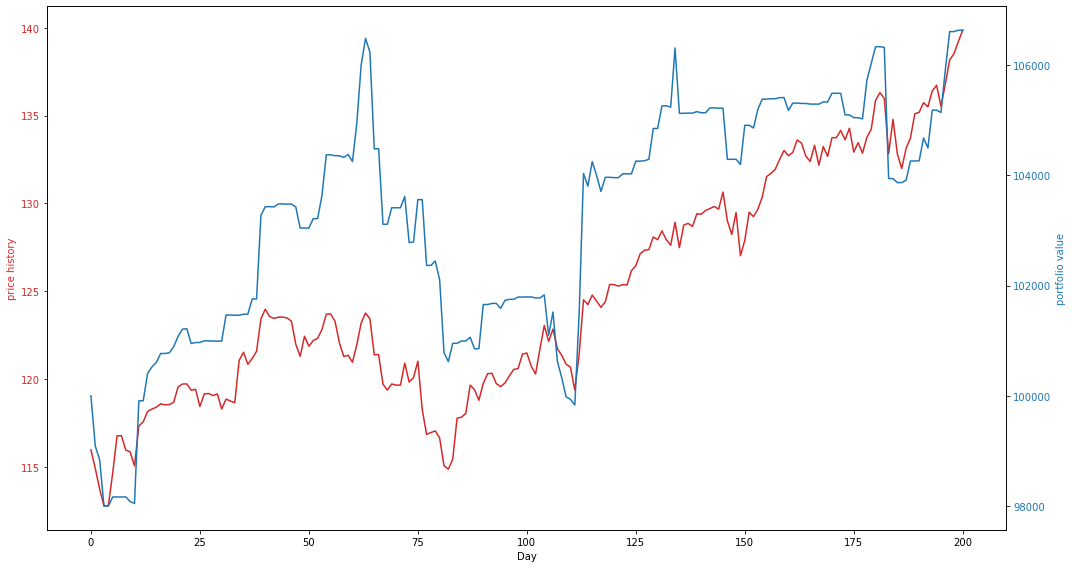

In [27]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('portfolio value', color=color)  # we already handled the x-label with ax1
ax2.plot(portfolio_value_history, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

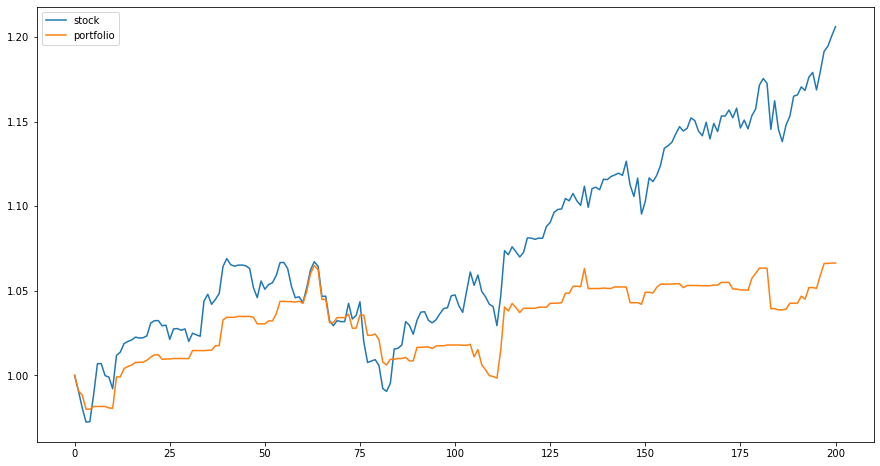

In [28]:
plt.plot(np.asarray(price_history)/price_history[0],label = 'stock')
plt.plot(np.asarray(portfolio_value_history)/portfolio_value_history[0],label = 'portfolio')
plt.legend()
plt.show()